# Face Detection Challenge

In [1]:
import numpy as np 
import pandas as pd

### Objectives
-  visualize images
-  preprocess images for Neural Networks
-  fit a custom CNN for a regression task
-  fine-tune a analyse model performance

## 1. Visualize images

👉 Load the dataset (200 Mo)

In [2]:
data = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/images.csv")
data

,age,pixels
0,1,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,202 205 209 210 209 209 210 211 212 214 218 21...
...,...,...
23700,99,127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701,99,23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702,99,59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703,99,45 108 120 156 206 197 140 180 191 199 204 207...


Each row represent the image of a face in black and white
- `age` is the age in year
- `pixels` contains the 2304 (= 48 * 48) flatten values of each pixel in the image, in a black scale from 0 to 255, stored as string

❓ Plot the histogram of age in your dataset

<AxesSubplot:>

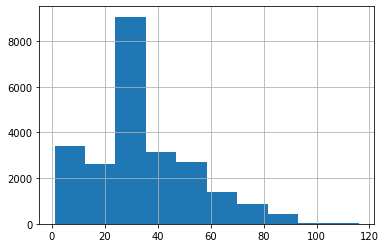

In [3]:
data.age.hist()

❓ Visually display one image of your choice.

In [4]:
import matplotlib.pyplot as plt

def get_img(img):
    new_img = []
    for nb in img.split(" "):
        new_img.append(int(nb))
    return new_img

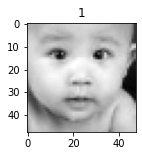

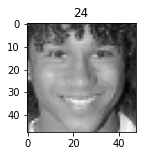

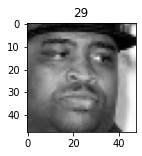

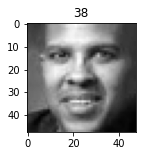

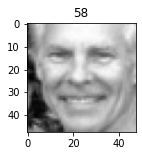

In [5]:
for i in [0,5000,10000,15000,20000]:
    label = data.age[i]
    img = get_img(data.pixels[i])
    img = np.reshape(img, (48,48))
    
    plt.figure(figsize=(2,2))
    plt.imshow(img, cmap='gray')
    plt.title(label)
    plt.show()

❓ What is the physical characteristic of the image at **index** `10000`?

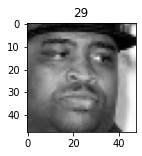

In [6]:
label = data.age[10000]
img = get_img(data.pixels[10000])
img = np.reshape(img, (48,48))
plt.figure(figsize=(2,2))
plt.imshow(img, cmap='gray')
plt.title(label)
plt.show()

In [7]:
# Store your result in the variable below

gender = "male"
# gender = "female"

# smile = True
smile = False

In [8]:
from nbresult import ChallengeResult
result = ChallengeResult('C14',
                         gender=gender,
                         smile=smile)
result.write()

## 2. Processing

❓ Your goal is to train a convolutional neural network model to predict the age of a person based solely on a picture of his/her face.
- Create your feature matrix `X` as nparray of shape suited for a CNN, scaled between 0 and 1
- Create your target vector `y`
- Create a holdout set (`X_train`, `y_train`) (`X_test`, `y_test`) keeping `30%` in the test set, randomly sampled out of the whole dataset

😌 Don't worry, you will be given the solution in the next question in case you don't make it

In [9]:
def get_img(img):
    new_img = []
    for nb in img.split(" "):
        new_img.append(int(nb)/255.)
    return new_img
def transform_pix(img):
    img = get_img(img)
    img = np.reshape(img, (48,48,1))
    return img

In [10]:
X = [transform_pix(img) for img in data.pixels]

In [11]:
X = np.asarray(X)

In [12]:
np.shape(X)

(23705, 48, 48, 1)

In [13]:
y = data.age

In [14]:
np.shape(y)

(23705,)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [16]:
from nbresult import ChallengeResult
result = ChallengeResult('C1415', 
                         X_train_shape = X_train.shape,
                         y_train_shape = y_train.shape,
                         first_image = X_train[0]
                        )
result.write()

## Convolutional Neural Network for Age prediction

❓ Build a convolutional neural network

- Do not use transfer learning
- Store number of trainable parameters in a variable `params_number`
- Plot your metric & loss at each epoch
- make sure your model does not overfit with appropriate control techniques
- Compute the mean absolute error on your test set and store it as `mae_test`
- Compute, store and compare it with a `mae_baseline`

💡 You will not be judged by the computing power of your computer, but you should obtain significantly better performance than the baseline in less than 3 minutes, even without GPUs

👉 Feel free to start back from the solution by running the cell below (~500Mo download)

In [17]:
import pickle

file_names = ["images_X_train.pickle", "images_X_test.pickle", "images_y_train.pickle", "images_y_test.pickle"]
pickles = dict()

for file_name in file_names:
    url = f"https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/{file_name}"
    command = f"curl --output {file_name} {url}"
    ! eval {command}
    with open(file_name, 'rb') as handle:
        pickles[file_name] = pickle.load(handle)
    command = f"rm {file_name}"
    ! eval {command}
        
X_train, X_test, y_train, y_test = pickles.values()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  291M  100  291M    0     0  8285k      0  0:00:36  0:00:36 --:--:-- 7664k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  125M  100  125M    0     0  6955k      0  0:00:18  0:00:18 --:--:-- 7610k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  129k  100  129k    0     0   372k      0 --:--:-- --:--:-- --:--:--  371k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 57023  100 57023    0     0   201k      0 --:--:-- --:--:-- --:--:--  201k


In [18]:
#Baseline model => predict average age in any case
pred = y_train.mean()
mae_baseline = abs(y_test-pred).mean()
mae_baseline

15.307923140641591

In [19]:
from tensorflow.keras import Sequential, layers
def initialize_model():
    model = Sequential()
    
    model.add(layers.Conv2D(32, (3,3), input_shape=(48, 48, 1), activation='relu', padding='same'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(15, activation='relu'))
    model.add(layers.Dropout(rate=0.5))
    model.add(layers.Dense(1, activation='linear'))
    
    return model

In [20]:
model = initialize_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 15)                276495    
_________________________________________________________________
dropout (Dropout)            (None, 15)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 16        
Total params: 276,831
Trainable params: 276,831
Non-trainable params: 0
__________________________________________________

In [21]:
params_number = 276831

In [22]:
def compile_model(model):
    # YOUR CODE HERE
    model.compile(
        optimizer='adam',
        loss='mse', 
        metrics = ['mae'])
    return model

In [23]:
from tensorflow.keras import callbacks
es = callbacks.EarlyStopping(patience=5, restore_best_weights=True)

model = initialize_model()
model = compile_model(model)
history = model.fit(X_train, y_train,
          batch_size=32,
          epochs=100,
          validation_split=0.3,
          callbacks=[es],
          verbose=1)

Epoch 1/100
363/363 [==============================] - 16s 41ms/step - loss: 613.4113 - mae: 19.2531 - val_loss: 330.4253 - val_mae: 13.3743
Epoch 2/100
363/363 [==============================] - 14s 38ms/step - loss: 456.4424 - mae: 16.4208 - val_loss: 292.2383 - val_mae: 12.5676
Epoch 3/100
363/363 [==============================] - 14s 37ms/step - loss: 432.8457 - mae: 15.9834 - val_loss: 280.1591 - val_mae: 12.2562
Epoch 4/100
363/363 [==============================] - 14s 38ms/step - loss: 404.6905 - mae: 15.3685 - val_loss: 230.0513 - val_mae: 11.3261
Epoch 5/100
363/363 [==============================] - 13s 37ms/step - loss: 387.5496 - mae: 14.9022 - val_loss: 248.7836 - val_mae: 11.6179
Epoch 6/100
363/363 [==============================] - 14s 38ms/step - loss: 366.5694 - mae: 14.4437 - val_loss: 208.6199 - val_mae: 10.8468
Epoch 7/100
363/363 [==============================] - 14s 37ms/step - loss: 361.1690 - mae: 14.2156 - val_loss: 216.1450 - val_mae: 10.7962
Epoch 8/100
3

(<AxesSubplot:title={'center':'loss'}>, <AxesSubplot:title={'center':'MAE'}>)

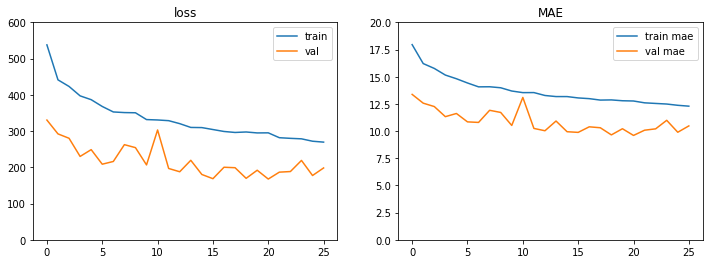

In [24]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label='train' + exp_name)
    ax1.plot(history.history['val_loss'], label='val' + exp_name)
    ax1.set_ylim(0., 600.)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['mae'], label='train mae'  + exp_name)
    ax2.plot(history.history['val_mae'], label='val mae'  + exp_name)
    ax2.set_ylim(0., 20.)
    ax2.set_title('MAE')
    ax2.legend()
    return (ax1, ax2)

plot_history(history)

In [25]:
model.evaluate(X_test, y_test)

223/223 [==============================] - 2s 11ms/step - loss: 154.1209 - mae: 9.2521


[154.12091064453125, 9.252081871032715]

In [26]:
mae_test = model.evaluate(X_test, y_test, verbose=0)[1]

In [27]:
assert mae_test < mae_baseline

In [28]:
from nbresult import ChallengeResult
result = ChallengeResult('C1516',
                         params_number=params_number,
                         mae_baseline = mae_baseline,
                         mae_test = mae_test,
                        )
result.write()

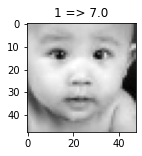

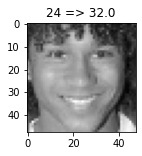

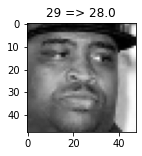

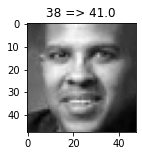

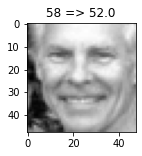

In [41]:
for i in [0,5000,10000,15000,20000]:
    pred = model.predict(np.reshape(X[i],(1,48,48,1)))[0][0]
    pred = round(pred)
    label = f'{data.age[i]} => {pred}'
    img = get_img(data.pixels[i])
    img = np.reshape(img, (48,48))
    
    plt.figure(figsize=(2,2))
    plt.imshow(img, cmap='gray')
    plt.title(label)
    plt.show()